In [ ]:
!pip install fake_useragent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=c34e739e094a34d4dfcae48c089d287ebff9b6b2398c3cebd8a6280a33185c9f
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent


Добрый день 

In [ ]:
import requests      # Библиотека для отправки запросов
import numpy as np   # Библиотека для матриц, векторов и линала
import pandas as pd  # Библиотека для табличек 
import time          # Библиотека для времени
from tqdm.auto import tqdm
# подгрузим один из методов этой библиотеки
from fake_useragent import UserAgent
from bs4 import BeautifulSoup

In [ ]:
tqdm.pandas()


#Parsing

In [ ]:
df_all = pd.DataFrame(columns = ['text','user','critic'])

In [ ]:
max_page = 195
for page in tqdm(range(max_page)):
  page_link = f'https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?page={page}'
  for i in range(3):
    time.sleep(0.3)
    try:
      response = requests.get(page_link, headers={'User-Agent': UserAgent().chrome})
      break
    except:
      continue
  html = response.text
  soup = BeautifulSoup(html, 'html.parser') 
  objects = soup.find_all('tr', attrs = {'class':''})
  for obj in objects:
    
    #Вытягиваю описание игры
    try:
      text = obj.find('div', attrs = {'class':'summary'}).text.strip()
    except:
      text = None
    #Вытягиваю оценку пользователей
    try:
      user_scr = obj.find(lambda tag: tag.name == 'div' and (tag.get('class') == ['metascore_w', 'user', 'large', 'game','positive'] or
                                                             tag.get('class') == ['metascore_w', 'user', 'large', 'game','mixed'] or
                                                             tag.get('class') == ['metascore_w', 'user', 'large', 'game','negative'])).text.strip()
    except:
      user_scr = None
    #Вытягиваю оценку критиков
    try:
      critic_scr = obj.find(lambda tag: tag.name == 'div' and (tag.get('class') == ['metascore_w',  'large', 'game','positive'] or
                                                             tag.get('class') == ['metascore_w',  'large', 'game','mixed'] or
                                                             tag.get('class') == ['metascore_w',  'large', 'game','negative'])).text.strip()
    except:
      critic_scr = None

    df_add = pd.DataFrame({'text':text,
                           'user':user_scr,
                           'critic':critic_scr}, index = [0])
    df_all = pd.concat([df_all,df_add])

  0%|          | 0/195 [00:00<?, ?it/s]

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "/usr/local/lib/python3.7/dist-packages/fake_useragent/utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


In [ ]:
df_all

,text,user,critic
0,"As a young boy, Link is tricked by Ganondorf, ...",9.1,99
0,As most major publishers' development efforts ...,7.4,98
0,[Metacritic's 2008 PS3 Game of the Year; Also ...,7.8,98
0,"This is a tale of souls and swords, transcendi...",8.4,98
0,[Metacritic's 2008 Xbox 360 Game of the Year; ...,7.9,98
...,...,...,...
0,Duke Nukem Critical Mass is the first installm...,3.6,29
0,"Welcome to the emergent open world, Wild West-...",1.6,29
0,Create your very own Ping Pal based on your ow...,3.9,28
0,Godzilla: Unleashed Double Smash is a fighting...,5.2,28


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19500 entries, 0 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    19500 non-null  object
 1   user    18101 non-null  object
 2   critic  19500 non-null  object
dtypes: object(3)
memory usage: 609.4+ KB


In [ ]:
df_all =df_all.astype({"user":float,'critic':float})
df_all.describe()

,user,critic
count,18101.000000,19500.000000
mean,6.992056,70.831436
std,1.329496,11.930571
min,0.300000,28.000000
25%,6.300000,64.000000
50%,7.300000,72.000000
75%,7.900000,80.000000
max,9.700000,99.000000


In [ ]:
df_all.reset_index(drop=True,inplace = True)
df_all

,text,user,critic
0,"As a young boy, Link is tricked by Ganondorf, ...",9.1,99.0
1,As most major publishers' development efforts ...,7.4,98.0
2,[Metacritic's 2008 PS3 Game of the Year; Also ...,7.8,98.0
3,"This is a tale of souls and swords, transcendi...",8.4,98.0
4,[Metacritic's 2008 Xbox 360 Game of the Year; ...,7.9,98.0
...,...,...,...
19495,Duke Nukem Critical Mass is the first installm...,3.6,29.0
19496,"Welcome to the emergent open world, Wild West-...",1.6,29.0
19497,Create your very own Ping Pal based on your ow...,3.9,28.0
19498,Godzilla: Unleashed Double Smash is a fighting...,5.2,28.0


In [ ]:
df_all.to_csv('metacritic.csv')

#NLP


In [ ]:
%matplotlib inline
! pip install pymorphy2
import matplotlib.pyplot as plt
import json
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore") 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 8.2 MB 48.4 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=e4507cbe9c5448b9d87c810bc190ab827c0b9c760a5ee92aa0dcb829cb008ceb
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [ ]:
df_all = pd.read_csv('metacritic.csv')
df_all.dropna(subset = ['text'], inplace = True)
df_all

,Unnamed: 0,text,user,critic
0,0,"As a young boy, Link is tricked by Ganondorf, ...",9.1,99.0
1,1,As most major publishers' development efforts ...,7.4,98.0
2,2,[Metacritic's 2008 PS3 Game of the Year; Also ...,7.8,98.0
3,3,"This is a tale of souls and swords, transcendi...",8.4,98.0
4,4,[Metacritic's 2008 Xbox 360 Game of the Year; ...,7.9,98.0
...,...,...,...,...
19495,19495,Duke Nukem Critical Mass is the first installm...,3.6,29.0
19496,19496,"Welcome to the emergent open world, Wild West-...",1.6,29.0
19497,19497,Create your very own Ping Pal based on your ow...,3.9,28.0
19498,19498,Godzilla: Unleashed Double Smash is a fighting...,5.2,28.0


##preprocess

In [ ]:
import string # библиотека для работы со строками
import nltk   # Natural Language Toolkit
# загружаем библиотеку для лемматизации
import pymorphy2 # Морфологический анализатор

# инициализируем лемматизатор
morph = pymorphy2.MorphAnalyzer()

In [ ]:
# загружаем список стоп-слов для русского
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

# примеры стоп-слов
stop_words[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
word_tokenizer = nltk.WordPunctTokenizer()
word_tokenizer.tokenize(df_all.loc[4].text)[:10]

['[', 'Metacritic', "'", 's', '2008', 'Xbox', '360', 'Game', 'of', 'the']

In [ ]:
def process_data(item):
    text_lower = item.lower() # приводим все слова к нижнему регистру
    #Удаляю упоминание игры года и платформы в начале
    if text_lower.startswith('[metacritic'):
      text_lower = text_lower[text_lower.find(']'):]
    #Убираю всю пунктуацию
    for punct in string.punctuation:
      text_lower = text_lower.replace(punct,'')
    tokens     = word_tokenizer.tokenize(text_lower) #разбиваем екст на слова
    # удаляем пунктуацию и стоп-слова
    tokens = [word for word in tokens if (word not in string.punctuation and word not in stop_words)]
    text_lemmatized = [morph.parse(x)[0].normal_form for x in tokens] # применяем лемматизацию для каждого слова в тексте
    return ' '.join(text_lemmatized)
    #return tokens

In [ ]:
df_all['preprocessed_text'] = df_all['text'].progress_apply(process_data)

  0%|          | 0/19397 [00:00<?, ?it/s]

In [ ]:
df_all.dropna(inplace = True)
df_all.user = df_all.user.progress_apply(lambda x: int(round(x,0)) )
df_all

  0%|          | 0/18017 [00:00<?, ?it/s]

,Unnamed: 0,text,user,critic,preprocessed_text
0,0,"As a young boy, Link is tricked by Ganondorf, ...",9,99.0,young boy link tricked ganondorf king gerudo t...
1,1,As most major publishers' development efforts ...,7,98.0,major publishers development efforts shift num...
2,2,[Metacritic's 2008 PS3 Game of the Year; Also ...,8,98.0,american dream mean today niko belic fresh boa...
3,3,"This is a tale of souls and swords, transcendi...",8,98.0,tale souls swords transcending world history t...
4,4,[Metacritic's 2008 Xbox 360 Game of the Year; ...,8,98.0,american dream mean today niko belic fresh boa...
...,...,...,...,...,...
19495,19495,Duke Nukem Critical Mass is the first installm...,4,29.0,duke nukem critical mass first installment duk...
19496,19496,"Welcome to the emergent open world, Wild West-...",2,29.0,welcome emergent open world wild westthemed ac...
19497,19497,Create your very own Ping Pal based on your ow...,4,28.0,create ping pal based individual style choosin...
19498,19498,Godzilla: Unleashed Double Smash is a fighting...,5,28.0,godzilla unleashed double smash fighting game ...


In [ ]:
df_all.loc[2].text

'[Metacritic\'s 2008 PS3 Game of the Year; Also known as "GTA IV"]  What does the American Dream mean today? For Niko Belic, fresh off the boat from Europe. It\'s the hope he can escape his past. For his cousin, Roman, it is the vision that together they can find fortune in Liberty City, gateway to the land of opportunity. As they slip into debt and are dragged into a criminal underworld by a series of shysters, thieves and sociopaths, they discover that the reality is very different from the dream in a city that worships money and status, and is heaven for those who have them an a living nightmare for those who don\'t. [Rockstar Games]'

In [ ]:
process_data(df_all.loc[2].text)

'american dream mean today niko belic fresh boat europe hope escape past cousin roman vision together find fortune liberty city gateway land opportunity slip debt dragged criminal underworld series shysters thieves sociopaths discover reality different dream city worships money status heaven living nightmare dont rockstar games'

## train


In [ ]:
#train test_split
from sklearn.model_selection import train_test_split
df_train = df_all.dropna(subset = ['user'])
train_texts, test_texts, train_y, test_y = train_test_split(df_train['preprocessed_text'],
                                                            df_train['user'],
                                                            test_size=0.2, 
                                                            random_state=21, 
                                                            stratify = df_train['user']
                                                            )

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2671b4390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd2671b4390>)

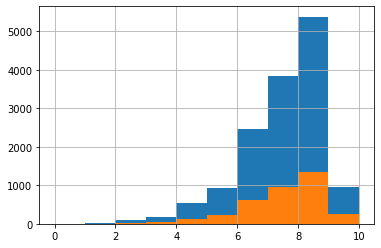

In [ ]:
train_y.hist(), test_y.hist()

In [ ]:
#вычисляем tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit TF-IDF on train texts
vectorizer = TfidfVectorizer(#max_features = 200,
                             norm = None, min_df = 220, max_df = .95) # возмем топ 200 слов
vectorizer.fit(train_texts)

# Топ-10 слов
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names()[-10:])
vectorizer.get_feature_names()[:10]

592
['work', 'world', 'worlds', 'xbox', 'year', 'years', 'yet', 'youll', 'young', 'youre']


['10', '100', '20', '2d', '30', '3d', 'abilities', 'ability', 'able', 'access']

In [ ]:
# Обучаем TF-IDF на train, а затем применяем к train и test
train_X = vectorizer.fit_transform(train_texts)
test_X  = vectorizer.transform(test_texts)

###CatBoost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.8 MB/s 


In [ ]:
from sklearn.utils import class_weight
weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = train_y.unique(), y = train_y)
weights = dict(zip(train_y.unique(),weights ))
weights

{0: 655.1363636363636,
 1: 54.59469696969697,
 2: 13.23507805325987,
 3: 6.9326599326599325,
 4: 2.382314049586777,
 5: 1.4180440771349863,
 6: 0.5343689752335755,
 7: 0.3423759412784759,
 8: 0.24359039361827983,
 9: 1.3662906436629065,
 10: 163.7840909090909}

In [ ]:
from catboost import CatBoostClassifier , Pool
train_data = Pool(
    train_X,
    label = train_y,
    #cat_features=[3],
    #embedding_features=[0, 1]    
)

eval_data = Pool(
    test_X,
    label = test_y
    #cat_features=[3],
    #embedding_features=[0, 1]    
)
clf_catboost = CatBoostClassifier(iterations=50,class_weights = weights,depth = 5,
                                  use_best_model = True)
clf_catboost.fit(train_data,
                 eval_set = eval_data)

Learning rate set to 0.357681
0:	learn: 2.1224025	test: 1.9571210	best: 1.9571210 (0)	total: 290ms	remaining: 14.2s
1:	learn: 2.0870083	test: 1.9526736	best: 1.9526736 (1)	total: 511ms	remaining: 12.3s
2:	learn: 2.0493463	test: 1.9555730	best: 1.9526736 (1)	total: 832ms	remaining: 13s
3:	learn: 1.9937443	test: 1.9613725	best: 1.9526736 (1)	total: 1.17s	remaining: 13.5s
4:	learn: 1.9457714	test: 1.9702445	best: 1.9526736 (1)	total: 1.52s	remaining: 13.7s
5:	learn: 1.9234964	test: 1.9708361	best: 1.9526736 (1)	total: 1.9s	remaining: 13.9s
6:	learn: 1.8793816	test: 1.9385505	best: 1.9385505 (6)	total: 2.52s	remaining: 15.5s
7:	learn: 1.8499532	test: 1.9093683	best: 1.9093683 (7)	total: 2.86s	remaining: 15s
8:	learn: 1.8250946	test: 1.9152767	best: 1.9093683 (7)	total: 3.08s	remaining: 14s
9:	learn: 1.7915246	test: 1.9083645	best: 1.9083645 (9)	total: 3.29s	remaining: 13.2s
10:	learn: 1.7644583	test: 1.9163292	best: 1.9083645 (9)	total: 3.51s	remaining: 12.4s
11:	learn: 1.7488807	test: 1.8

In [ ]:
#print('train ROC-AUC =',  roc_auc_score(train_y, clf_catboost.predict(train_X)), 
#      'test ROC-AUC =',  roc_auc_score(test_y, clf_catboost.predict(test_X)))
print(classification_report(test_y, clf_catboost.predict(test_X)))
confusion_matrix(test_y, clf_catboost.predict(test_X))

              precision    recall  f1-score   support

           0       0.07      1.00      0.12         1
           1       0.00      0.17      0.01         6
           2       0.02      0.32      0.03        25
           3       0.02      0.30      0.04        47
           4       0.03      0.07      0.04       137
           5       0.08      0.06      0.07       231
           6       0.23      0.06      0.10       613
           7       0.30      0.27      0.29       957
           8       0.49      0.03      0.05      1345
           9       0.10      0.16      0.12       240
          10       0.01      0.50      0.01         2

    accuracy                           0.12      3604
   macro avg       0.12      0.27      0.08      3604
weighted avg       0.31      0.12      0.13      3604



array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   3,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0,   4,   8,   4,   2,   0,   0,   1,   1,   5,   0],
       [  0,   2,  12,  14,   6,   1,   1,   6,   0,   5,   0],
       [  1,   8,  22,  25,  10,   7,   9,  36,   2,   9,   8],
       [  0,  16,  37,  29,  20,  14,  10,  63,   2,  31,   9],
       [  3,  44,  79, 101,  63,  37,  39, 144,  10,  63,  30],
       [  5,  50, 134, 166, 113,  32,  45, 260,  17,  86,  49],
       [  3,  92, 206, 210, 151,  78,  60, 301,  36, 156,  52],
       [  2,  12,  26,  38,  30,  14,   7,  52,   6,  38,  15],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   1]])

In [ ]:
print(classification_report(train_y, clf_catboost.predict(train_X)))
confusion_matrix(train_y, clf_catboost.predict(train_X))

              precision    recall  f1-score   support

           0       0.03      1.00      0.06         2
           1       0.02      0.83      0.04        24
           2       0.02      0.45      0.04        99
           3       0.03      0.39      0.06       189
           4       0.06      0.18      0.09       550
           5       0.10      0.08      0.09       924
           6       0.22      0.06      0.09      2452
           7       0.29      0.27      0.28      3827
           8       0.47      0.02      0.05      5379
           9       0.11      0.18      0.14       959
          10       0.01      1.00      0.02         8

    accuracy                           0.13     14413
   macro avg       0.12      0.41      0.09     14413
weighted avg       0.31      0.13      0.13     14413



array([[   2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,   20,    0,    2,    0,    0,    1,    1,    0,    0,    0],
       [   1,    7,   45,    8,    6,    1,    3,   20,    0,    4,    4],
       [   0,   11,   22,   74,   14,    6,    3,   40,    0,   14,    5],
       [   3,   32,   92,   83,   99,   22,   25,  125,   10,   39,   20],
       [   6,   49,  152,  133,   86,   76,   47,  243,   15,   79,   38],
       [   7,  159,  342,  372,  300,  108,  144,  628,   40,  238,  114],
       [  20,  231,  605,  519,  466,  190,  156, 1034,   68,  390,  148],
       [  20,  303,  813,  803,  618,  291,  245, 1284,  131,  619,  252],
       [   2,   65,  137,  141,   86,   56,   36,  196,   16,  173,   51],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    8]])

###LinearRegression

In [ ]:
#import алгоритма из библиотеки
from sklearn.linear_model import LinearRegression

# инициализируем модель
LinReg = LinearRegression(n_jobs = -1)

# обучаем ее на тренировочных данных
LinReg = LinReg.fit(train_X, train_y)

# делаем предсказание для тестовых данных
pred = LinReg.predict(test_X)

In [ ]:
LinReg.score(train_X, train_y)

0.10779673489034647

In [ ]:
from sklearn.metrics import r2_score
r2_score(test_y, pred)

0.012831173411542385

In [ ]:
np.mean(pred)

6.9913983893474425

In [ ]:
np.std(pred)

0.448331951089394

##Бинарная

In [ ]:
median = df_all.user.median()

In [ ]:
mean = df_all.user.mean()

In [ ]:
mean = df_all.critic.mean()
median = df_all.critic.median()

In [ ]:
df_all['critic_bin'] = df_all.critic.progress_apply(lambda x: 1 if x > mean else 0 )
df_all

  0%|          | 0/18017 [00:00<?, ?it/s]

,Unnamed: 0,text,user,critic,preprocessed_text,critic_bin
0,0,"As a young boy, Link is tricked by Ganondorf, ...",9,99.0,young boy link tricked ganondorf king gerudo t...,1
1,1,As most major publishers' development efforts ...,7,98.0,major publishers development efforts shift num...,1
2,2,[Metacritic's 2008 PS3 Game of the Year; Also ...,8,98.0,american dream mean today niko belic fresh boa...,1
3,3,"This is a tale of souls and swords, transcendi...",8,98.0,tale souls swords transcending world history t...,1
4,4,[Metacritic's 2008 Xbox 360 Game of the Year; ...,8,98.0,american dream mean today niko belic fresh boa...,1
...,...,...,...,...,...,...
19495,19495,Duke Nukem Critical Mass is the first installm...,4,29.0,duke nukem critical mass first installment duk...,0
19496,19496,"Welcome to the emergent open world, Wild West-...",2,29.0,welcome emergent open world wild westthemed ac...,0
19497,19497,Create your very own Ping Pal based on your ow...,4,28.0,create ping pal based individual style choosin...,0
19498,19498,Godzilla: Unleashed Double Smash is a fighting...,5,28.0,godzilla unleashed double smash fighting game ...,0


In [ ]:
df_all.describe()

,Unnamed: 0,user,critic,critic_bin
count,18017.000000,18017.000000,18017.000000,18017.000000
mean,9462.939280,6.997280,71.374924,0.557362
std,5630.214526,1.365264,11.907630,0.496712
min,0.000000,0.000000,28.000000,0.000000
25%,4572.000000,6.000000,65.000000,0.000000
50%,9307.000000,7.000000,73.000000,1.000000
75%,14283.000000,8.000000,80.000000,1.000000
max,19499.000000,10.000000,99.000000,1.000000


In [ ]:
#train test_split
col = 'critic_bin'
from sklearn.model_selection import train_test_split
df_train = df_all.dropna(subset = [col])
train_texts, test_texts, train_y, test_y = train_test_split(
    df_train['preprocessed_text'],
    df_train[col],
    test_size=0.2, 
    random_state=21, 
    stratify = df_train[col]
    )

In [ ]:
#вычисляем tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit TF-IDF on train texts
vectorizer = TfidfVectorizer(#max_features = 400,
                             norm = None, min_df = 0.1, max_df = 1.0) # возмем топ 200 слов
vectorizer.fit(train_texts)

# Топ-10 слов
# Обучаем TF-IDF на train, а затем применяем к train и test
print(len(vectorizer.get_feature_names()))
print(vectorizer.get_feature_names()[-10:])
print(vectorizer.get_feature_names()[:10] )


train_X = vectorizer.fit_transform(train_texts)
test_X  = vectorizer.transform(test_texts)

33
['series', 'set', 'story', 'system', 'take', 'time', 'unique', 'use', 'way', 'world']
['action', 'adventure', 'also', 'battle', 'characters', 'combat', 'control', 'experience', 'features', 'fight']


In [ ]:

feature_names = vectorizer.get_feature_names()
doc = 0
feature_index = train_X[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [train_X[doc, x] for x in feature_index])


In [ ]:
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
  print( w, s)

way 3.0086095594711466
take 2.723905028218497
battle 2.9286464031281483
players 4.560314249696484
gameplay 3.013273988762502
action 2.844463206238702


In [ ]:
from sklearn.utils import class_weight
weights = class_weight.compute_class_weight(class_weight = 'balanced',classes = train_y.unique(), y = train_y)
weights = dict(zip(train_y.unique(),weights ))
weights

{0: 1.1295454545454546, 1: 0.8971119133574007}

###CatBoost

In [ ]:
from catboost import CatBoostClassifier , Pool
train_data = Pool(
    train_X,
    label = train_y,
    #cat_features=[3],
    #embedding_features=[0, 1]    
)

eval_data = Pool(
    test_X,
    label = test_y
    #cat_features=[3],
    #embedding_features=[0, 1]    
)
clf_catboost = CatBoostClassifier(iterations=6000,class_weights = weights,
                                  use_best_model = True)
clf_catboost.fit(train_data,
                 eval_set = eval_data)

Выходные данные были обрезаны до нескольких последних строк (5000).
1005:	learn: 0.5952800	test: 0.6572835	best: 0.6572642 (1001)	total: 13.2s	remaining: 1m 5s
1006:	learn: 0.5952215	test: 0.6572304	best: 0.6572304 (1006)	total: 13.2s	remaining: 1m 5s
1007:	learn: 0.5951858	test: 0.6572352	best: 0.6572304 (1006)	total: 13.2s	remaining: 1m 5s
1008:	learn: 0.5951245	test: 0.6572317	best: 0.6572304 (1006)	total: 13.2s	remaining: 1m 5s
1009:	learn: 0.5950347	test: 0.6572377	best: 0.6572304 (1006)	total: 13.2s	remaining: 1m 5s
1010:	learn: 0.5949739	test: 0.6572660	best: 0.6572304 (1006)	total: 13.2s	remaining: 1m 5s
1011:	learn: 0.5948890	test: 0.6572604	best: 0.6572304 (1006)	total: 13.2s	remaining: 1m 5s
1012:	learn: 0.5948569	test: 0.6572137	best: 0.6572137 (1012)	total: 13.3s	remaining: 1m 5s
1013:	learn: 0.5947897	test: 0.6572331	best: 0.6572137 (1012)	total: 13.3s	remaining: 1m 5s
1014:	learn: 0.5947261	test: 0.6572030	best: 0.6572030 (1014)	total: 13.3s	remaining: 1m 5s
1015:	learn:

In [ ]:
#print('train ROC-AUC =',  roc_auc_score(train_y, clf_catboost.predict(train_X)), 
#      'test ROC-AUC =',  roc_auc_score(test_y, clf_catboost.predict(test_X)))
print(classification_report(test_y, clf_catboost.predict(test_X)))
confusion_matrix(test_y, clf_catboost.predict(test_X))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1595
           1       0.64      0.64      0.64      2009

    accuracy                           0.60      3604
   macro avg       0.59      0.59      0.59      3604
weighted avg       0.60      0.60      0.60      3604



array([[ 875,  720],
       [ 723, 1286]])

In [ ]:
print(classification_report(train_y, clf_catboost.predict(train_X)))
confusion_matrix(train_y, clf_catboost.predict(train_X))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      6380
           1       0.76      0.75      0.75      8033

    accuracy                           0.73     14413
   macro avg       0.72      0.72      0.72     14413
weighted avg       0.73      0.73      0.73     14413



array([[4458, 1922],
       [2016, 6017]])

###RandomForestClassifier

In [ ]:
#import алгоритма из библиотеки
from sklearn.ensemble import RandomForestClassifier

# инициализируем модель
clf = RandomForestClassifier(n_estimators = 500, max_depth = 10)

# обучаем ее на тренировочных данных
clf = clf.fit(train_X, train_y)

# делаем предсказание для тестовых данных
pred = clf.predict(test_X)

In [ ]:
#print('train ROC-AUC =',  roc_auc_score(train_y, clf_catboost.predict(train_X)), 
#      'test ROC-AUC =',  roc_auc_score(test_y, clf_catboost.predict(test_X)))
print(classification_report(test_y, pred))
confusion_matrix(test_y, pred)

              precision    recall  f1-score   support

           0       0.64      0.20      0.31      1595
           1       0.59      0.91      0.72      2009

    accuracy                           0.60      3604
   macro avg       0.61      0.56      0.51      3604
weighted avg       0.61      0.60      0.53      3604



array([[ 323, 1272],
       [ 182, 1827]])